In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [10]:
train = pd.read_csv('loan_data_set.csv')

In [9]:
train_original=train.copy()

In [11]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
test=pd.read_csv("loan_data_set(test).csv")

In [14]:
test_original=test.copy()

In [16]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [17]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [18]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [19]:
train.shape

(614, 13)

In [20]:
test.shape

(614, 12)

In [21]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [22]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

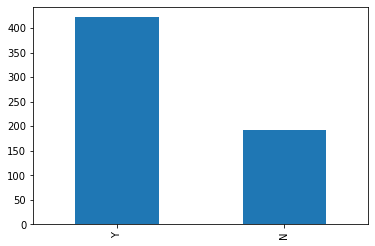

In [24]:
train['Loan_Status'].value_counts().plot.bar()

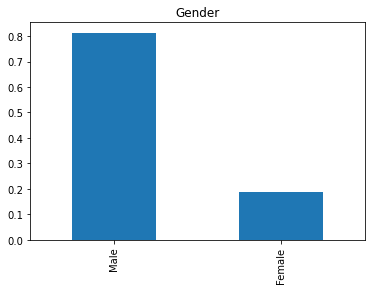

In [32]:
train['Gender'].value_counts(normalize=1).plot.bar(title='Gender')
plt.show()

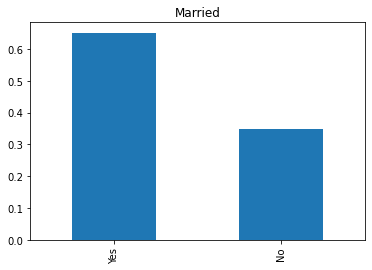

In [35]:
train['Married'].value_counts(normalize=1).plot.bar(title='Married')
plt.show()

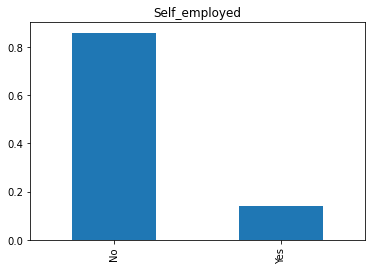

In [39]:
train['Self_Employed'].value_counts(normalize=1).plot.bar(title='Self_employed')
plt.show()

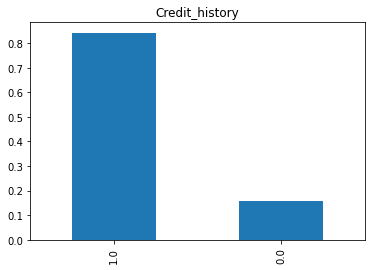

In [41]:
train['Credit_History'].value_counts(normalize=1).plot.bar(title="Credit_history")
plt.show()

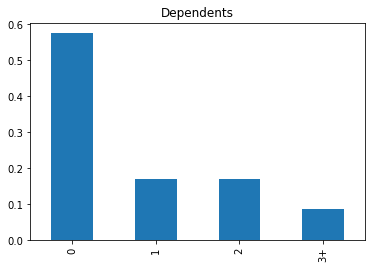

In [48]:
train['Dependents'].value_counts(normalize=1).plot.bar(title="Dependents"'')
plt.show()

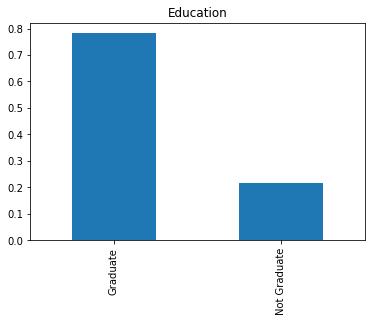

In [46]:
train['Education'].value_counts(normalize=1).plot.bar(title="Education")
plt.show()

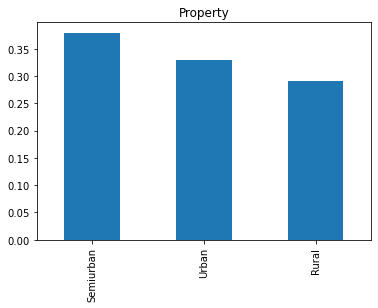

In [47]:
train['Property_Area'].value_counts(normalize=1).plot.bar(title="Property")
plt.show()

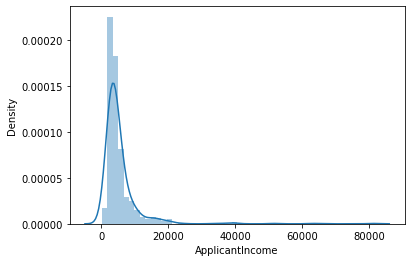

In [63]:
sns.distplot(train['ApplicantIncome'])
plt.show()

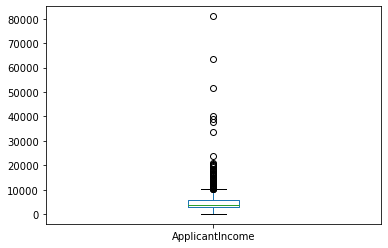

In [68]:
train['ApplicantIncome'].plot.box()
plt.show()

Text(0.5, 0.98, 'Applicant Income by education')

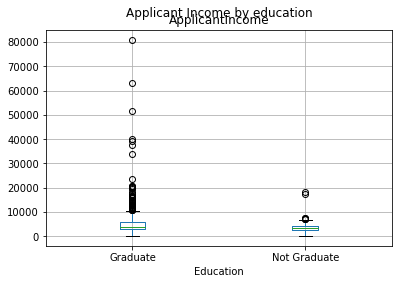

In [75]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("Applicant Income by education")

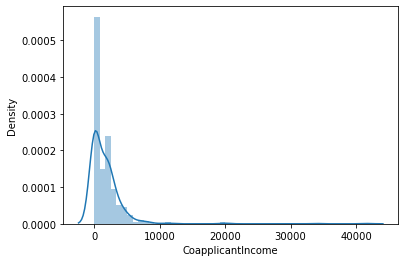

In [72]:
sns.distplot(train['CoapplicantIncome'])
plt.show()

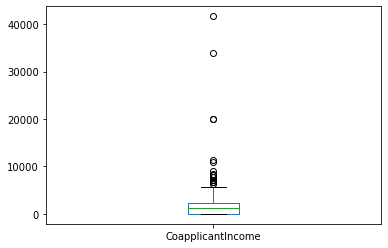

In [78]:
train['CoapplicantIncome'].plot.box()
plt.show()

In [87]:
train.notna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,True,True,True,True,True,True,True,True,False,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,True,True,True,True,True,True,True,True,True,True,True,True,True
610,True,True,True,True,True,True,True,True,True,True,True,True,True
611,True,True,True,True,True,True,True,True,True,True,True,True,True
612,True,True,True,True,True,True,True,True,True,True,True,True,True


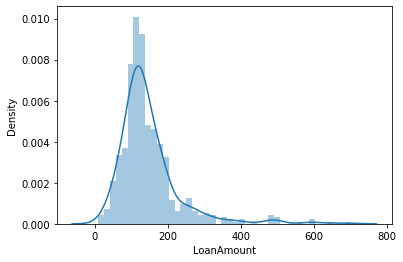

In [86]:
sns.distplot(train['LoanAmount'])
plt.show()

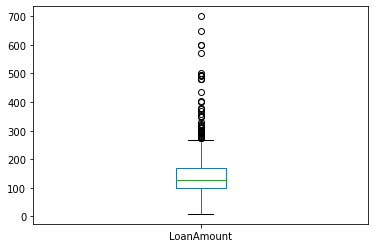

In [90]:
train['LoanAmount'].plot.box()
plt.show()

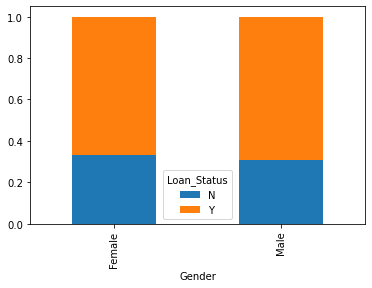

In [91]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=1)
plt.show()

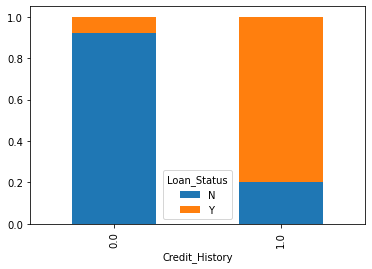

In [95]:
Credit_history=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_history.div(Credit_history.sum(1).astype(float),axis=0).plot(kind="bar",stacked=1)
plt.show()

<AxesSubplot:xlabel='Loan_Status'>

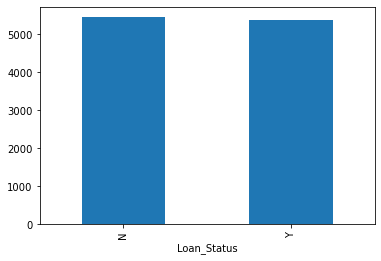

In [97]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

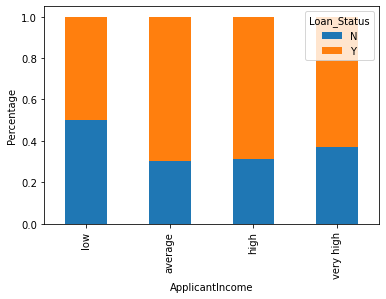

In [107]:
bins=[0,250,4000,6000,8000]
group=['low','average','high','very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0.).plot(kind='bar',stacked=1)
plt.xlabel('ApplicantIncome')
p=plt.ylabel('Percentage')

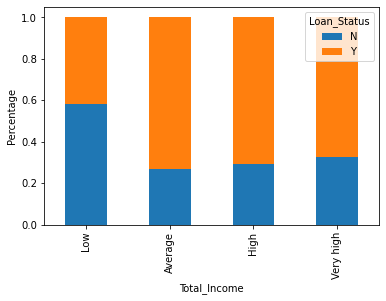

In [114]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

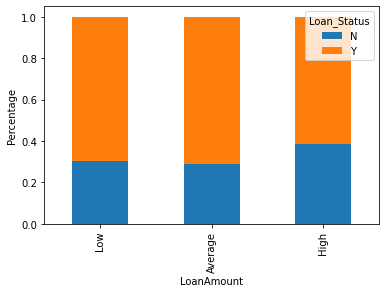

In [115]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

In [116]:
train.shape

(614, 17)

In [118]:
train=train.drop(['Income_bin', 'LoanAmount_bin', 'Total_Income_bin','Total_Income'], axis=1)

In [119]:
train.shape

(614, 13)

In [123]:
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

<AxesSubplot:>

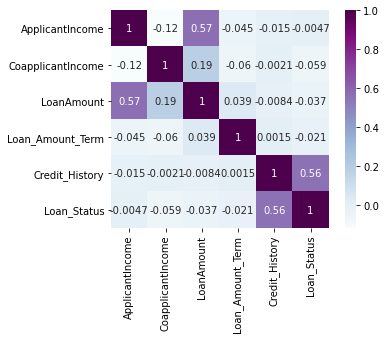

In [126]:
matrix=train.corr()
f,ax=plt.subplots()
sns.heatmap(matrix,vmax=1,square=True,cmap='BuPu',annot=True)

In [128]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [129]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [130]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [131]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [132]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [133]:
train['LoanAmount'].fillna(train['LoanAmount'].mode()[0],inplace=True)

In [134]:
train['LoanAmount'].value_counts()

120.0    42
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [135]:
train['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [137]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [138]:
train['LoanAmount_log']=np.log(train['LoanAmount'])

<AxesSubplot:>

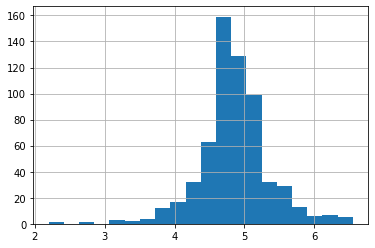

In [141]:
train['LoanAmount_log'].hist(bins=20)

In [142]:
test['LoanAmount_log']=np.log(test['LoanAmount'])

<AxesSubplot:>

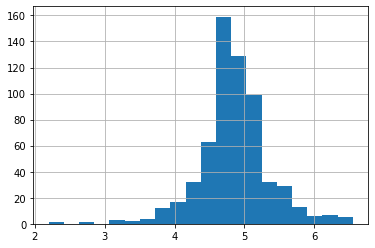

In [143]:
train['LoanAmount_log'].hist(bins=20)

In [144]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [145]:
X=train.drop('Loan_Status',1)

In [146]:
Y=train.Loan_Status

In [147]:
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [153]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,Y,test_size=0.3)

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [156]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.7837837837837838

In [164]:
test.notnull().sum()

ApplicantIncome            614
CoapplicantIncome          614
LoanAmount                 592
Loan_Amount_Term           600
Credit_History             564
LoanAmount_log             592
Gender_Female              614
Gender_Male                614
Married_No                 614
Married_Yes                614
Dependents_3               614
Dependents_0               614
Dependents_1               614
Dependents_2               614
Education_Graduate         614
Education_Not Graduate     614
Self_Employed_No           614
Self_Employed_Yes          614
Property_Area_Rural        614
Property_Area_Semiurban    614
Property_Area_Urban        614
dtype: int64

In [165]:
test['LoanAmount'].fillna(test['LoanAmount'].mode()[0],inplace=True)

In [166]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)

In [170]:
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

In [171]:
test.notnull().sum()

ApplicantIncome            614
CoapplicantIncome          614
LoanAmount                 614
Loan_Amount_Term           614
Credit_History             614
LoanAmount_log             592
Gender_Female              614
Gender_Male                614
Married_No                 614
Married_Yes                614
Dependents_3               614
Dependents_0               614
Dependents_1               614
Dependents_2               614
Education_Graduate         614
Education_Not Graduate     614
Self_Employed_No           614
Self_Employed_Yes          614
Property_Area_Rural        614
Property_Area_Semiurban    614
Property_Area_Urban        614
dtype: int64

In [172]:
test['LoanAmount_log']=np.log(test['LoanAmount'])

In [173]:
test.notnull().sum()

ApplicantIncome            614
CoapplicantIncome          614
LoanAmount                 614
Loan_Amount_Term           614
Credit_History             614
LoanAmount_log             614
Gender_Female              614
Gender_Male                614
Married_No                 614
Married_Yes                614
Dependents_3               614
Dependents_0               614
Dependents_1               614
Dependents_2               614
Education_Graduate         614
Education_Not Graduate     614
Self_Employed_No           614
Self_Employed_Yes          614
Property_Area_Rural        614
Property_Area_Semiurban    614
Property_Area_Urban        614
dtype: int64

In [174]:
test.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
LoanAmount_log             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_3               0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [175]:
pred_test = model.predict(test)

In [182]:
accuracy_score(y_cv,pred_cv)

0.7837837837837838

In [191]:
Final=pd.read_csv('loan_data_set.csv')

In [192]:
Final['Loan_ID']=test_original['Loan_ID']

In [193]:
Final['Loan_Status']=pred_test

In [194]:
Final['Loan_Status'].replace(0, 'N', inplace=True)
Final['Loan_Status'].replace(1, 'Y', inplace=True)

In [196]:
Final=Final.drop(['Gender','Married','Dependents','Education','Self_Employed'],axis=1)

In [197]:
Final=Final.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area'],axis=1)

In [198]:
pd.DataFrame(Final,columns=['Loan_ID','Loan_Status']).to_csv('log_reg_output.csv')